<a href="https://colab.research.google.com/github/DevendraChoudhary15/Partical-Image-velocimetry/blob/main/smartphone_piv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!/opt/bin/nvidia-smi
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb 2> /dev/null
!apt-key add /var/cuda-repo-8-0-local-ga2/7fa2af80.pub
!apt-get update
!apt-get install -qq cuda gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!/usr/local/cuda/bin/nvcc --version

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# put nvcc on PATH for PyCUDA install
import os
work_dir = os.getcwd()
if "/usr/local/cuda/bin" not in os.environ['PATH'].split(':'):
  os.environ['PATH'] += ":/usr/local/cuda/bin"
  
! echo $PATH
! nvcc --version

! pwd
! ls

In [ ]:
# install pycuda using pip
! pip install pycuda

In [ ]:
# check to make sure PyCUDA installed properly
# import pycuda.autoinit

In [ ]:
!pip install cython

In [ ]:
!# install scikits-cuda from github as the pip version cant find cusolver
!git clone https://github.com/lebedov/scikit-cuda.git


In [ ]:
#!ls
os.chdir(work_dir)
os.chdir('scikit-cuda')
%run setup.py install
# %run setup.py test

# add scikit-cuda to the PYTHONPATH
import sys
sys.path.append(os.getcwd())
os.chdir(work_dir)

In [ ]:
! pip install progressbar

In [ ]:
!git clone http://github.com/alexlib/openpiv-python.git
os.chdir('openpiv-python')
sys.path.append(os.getcwd())
!python setup.py build
!python setup.py install

In [ ]:
import openpiv

**smartphoneopenpiv**



In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# from openpiv import pyprocess, tools
# import pkg_resources as pkg

# # import numpy as np

# import matplotlib.animation as animation

In [ ]:
# def simple_piv(im1, im2, plot=True):
#     """
#     Simplest PIV run on the pair of images using default settings
#     piv(im1,im2) will create a tmp.vec file with the vector filed in pix/dt
#     (dt=1) from two images, im1,im2 provided as full path filenames
#     (TIF is preferable, whatever imageio can read)
#     """
#     if isinstance(im1, str):
#         im1 = tools.imread(im1)
#         im2 = tools.imread(im2)

#     u, v, s2n = pyprocess.extended_search_area_piv(
#         im1.astype(np.int32), im2.astype(np.int32), window_size=32,
#         overlap=16, search_area_size=32
#     )
#     x, y = pyprocess.get_coordinates(image_size=im1.shape,
#                                      search_area_size=32, overlap=16)

#     valid = s2n > np.percentile(s2n, 5)

#     if plot:
#         _, ax = plt.subplots(figsize=(6, 6))
#         ax.imshow(im1, cmap=plt.get_cmap("gray"), alpha=0.5, origin="upper")
#         ax.quiver(x[valid], y[valid], u[valid], -v[valid], scale=70,
#                   color='r', width=.005)
#         plt.show()

#     return x, y, u, v


In [ ]:
# def piv_example():
#     """
#     PIV example uses examples/test5 vortex PIV data to show the main principles
#     piv(im1,im2) will create a tmp.vec file with the vector filed in pix/dt
#     (dt=1) from two images, im1,im2 provided as full path filenames
#     (TIF is preferable)
#     """
#     # if im1 is None and im2 is None:
#     im1 = pkg.resource_filename("openpiv", "data/test1/exp1_001_a.bmp")
#     im2 = pkg.resource_filename("openpiv", "data/test1/exp1_001_b.bmp")

#     frame_a = tools.imread(im1)
#     frame_b = tools.imread(im2)

#     # frame_a[0:32, 512 - 32:] = 255

#     images = []
#     images.extend([frame_a, frame_b])

#     fig, ax = plt.subplots()

#     # ims is a list of lists, each row is a list of artists to draw in the
#     # current frame; here we are just animating one artist, the image, in
#     # each frame
#     ims = []
#     for i in range(2):
#         im = ax.imshow(images[i % 2], animated=True, cmap="gray")
#         ims.append([im])

#     _ = animation.ArtistAnimation(fig, ims, interval=500, blit=False,
#                                   repeat_delay=0)
#     plt.show()

#     # import os

#     vel = pyprocess.extended_search_area_piv(
#         frame_a.astype(np.int32), frame_b.astype(np.int32), window_size=32,
#         search_area_size=64,
#         overlap=8
#     )
#     x, y = pyprocess.get_coordinates(image_size=frame_a.shape,
#                                      search_area_size=64, overlap=8)

#     fig, ax = plt.subplots(1, 2, figsize=(11, 8))
#     ax[0].imshow(frame_a, cmap=plt.get_cmap("gray"), alpha=0.8)
#     ax[0].quiver(x, y, vel[0], -vel[1], scale=50, color="r")
#     ax[1].quiver(x, y[::-1, :], vel[0], -1*vel[1], scale=50, color="b")
#     ax[1].set_aspect(1)
#     # ax[1].invert_yaxis()
#     plt.show()

#     return x, y, vel[0], vel[1]

**smartphone piv**


In [ ]:
from openpiv import tools, validation, filters, scaling, pyprocess
# import openpiv.process
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [ ]:
# import the standard numerical and plotting packages

from skimage.io import imread


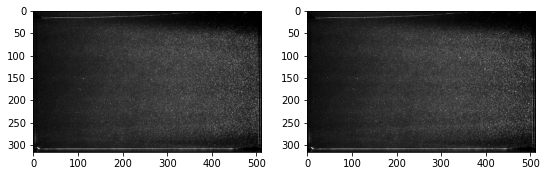

In [ ]:
# load the images
a = tools.imread("imageA.tif")
b = tools.imread("imageB.tif")

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].imshow(a, cmap=plt.cm.gray)
axs[1].imshow(b, cmap=plt.cm.gray)
plt.show()

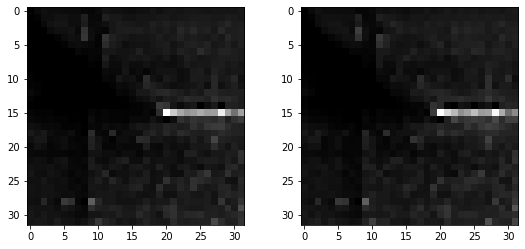

In [ ]:
win_size = 32

a_win = a[:win_size, :win_size].copy()
b_win = b[:win_size, :win_size].copy()

fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].imshow(a_win, cmap=plt.cm.gray)
axs[1].imshow(b_win, cmap=plt.cm.gray)
plt.show()

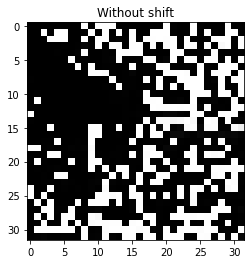

In [ ]:
fig = plt.imshow(b_win - a_win, cmap=plt.cm.gray)
plt.title("Without shift")
plt.show()

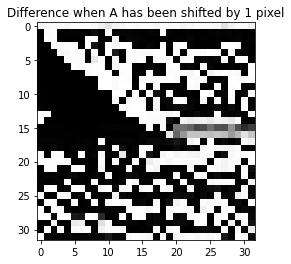

In [ ]:
plt.imshow(b_win - np.roll(a_win, (1, 0), axis=(0, 1)), cmap=plt.cm.gray)
plt.title("Difference when A has been shifted by 1 pixel")
plt.show()

In [ ]:
def match_template(img, template, maxroll=8):
    best_dist = np.inf
    best_shift = (-1, -1)
    for y in range(maxroll):
        for x in range(maxroll):
            # calculate Euclidean distance
            dist = np.sqrt(np.sum((img - np.roll(template, (y, x), axis=(0, 1))) ** 2))
            if dist < best_dist:
                best_dist = dist
                best_shift = (y, x)
    return (best_dist, best_shift)

In [ ]:
# let's test that it works by manually rolling (shifting circurlarly) the same
# image
match_template(np.roll(a_win, (2, 0), axis=(0, 1)), a_win)

(0.0, (2, 0))

In [ ]:
# indeed, when we find the correct shift, we got zero distance. it's not so in real images:
best_dist, best_shift = match_template(b_win, a_win)
# print(f"{best_dist=}")
# print(f"{best_shift=}")

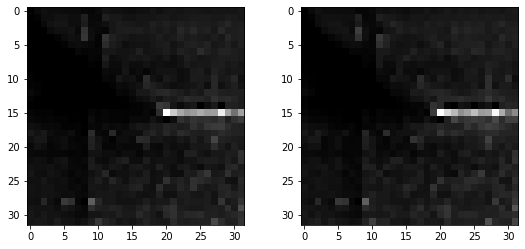

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs[0].imshow(np.roll(a_win, best_shift, axis=(0, 1)), cmap=plt.cm.gray)
axs[1].imshow(b_win, cmap=plt.cm.gray)
plt.show()

In [ ]:
from scipy.signal import correlate

cross_corr = correlate(b_win - b_win.mean(), a_win - a_win.mean(), method="fft")
# Note that it's approximately twice as large than the original windows, as we
# can shift a_win by a maximum of it's size - 1 horizontally and vertically
# while still maintaining some overlap between the two windows.
print("Size of the correlation map: %d x %d" % cross_corr.shape)

Size of the correlation map: 63 x 63


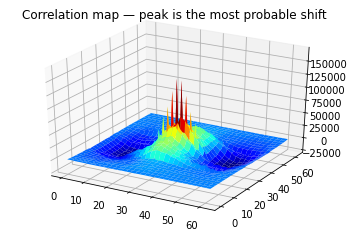

In [ ]:
# let's see what the cross-correlation looks like
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
Y, X = np.meshgrid(np.arange(cross_corr.shape[0]), np.arange(cross_corr.shape[1]))

ax.plot_surface(Y, X, cross_corr, cmap=plt.cm.jet, linewidth=0.2)
plt.title("Correlation map — peak is the most probable shift")
plt.show()

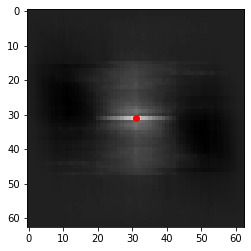

In [ ]:
# let's see the same correlation map, from above
plt.imshow(cross_corr, cmap=plt.cm.gray)

y, x = np.unravel_index(cross_corr.argmax(), cross_corr.shape)
# print(f"{y=}, {x=}")

plt.plot(x, y, "ro")
plt.show()

In [ ]:
dy, dx = y - 31, x - 31
# print(f"{dy=}, {dx=}")

In [ ]:
def vel_field(curr_frame, next_frame, win_size):
    ys = np.arange(0, curr_frame.shape[0], win_size)
    xs = np.arange(0, curr_frame.shape[1], win_size)
    dys = np.zeros((len(ys), len(xs)))
    dxs = np.zeros((len(ys), len(xs)))
    for iy, y in enumerate(ys):
        for ix, x in enumerate(xs):
            int_win = curr_frame[y : y + win_size, x : x + win_size]
            search_win = next_frame[y : y + win_size, x : x + win_size]
            cross_corr = correlate(
                search_win - search_win.mean(), int_win - int_win.mean(), method="fft"
            )
            dys[iy, ix], dxs[iy, ix] = (
                np.unravel_index(np.argmax(cross_corr), cross_corr.shape)
                - np.array([win_size, win_size])
                + 1
            )
    # draw velocity vectors from the center of each window
    ys = ys + win_size / 2
    xs = xs + win_size / 2
    return xs, ys, dxs, dys

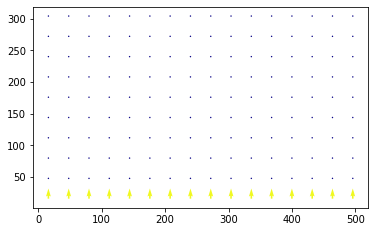

In [ ]:
xs, ys, dxs, dys = vel_field(a, b, 32)
norm_drs = np.sqrt(dxs ** 2 + dys ** 2)

fig, ax = plt.subplots(figsize=(6, 6))
# we need these flips on y since quiver uses a bottom-left origin, while our
# arrays use a top-right origin
ax.quiver(
    xs,
    ys[::-1],
    dxs,
    -dys,
    norm_drs,
    cmap=plt.cm.plasma,
    angles="xy",
    scale_units="xy",
    scale=0.25,
)
ax.set_aspect("equal")
plt.show()

In [ ]:
def vel_field_asymmetric_wins(
    curr_frame, next_frame, half_int_win_size, half_search_win_size
):
    ys = np.arange(half_int_win_size[0], curr_frame.shape[0], 2 * half_int_win_size[0])
    xs = np.arange(half_int_win_size[1], curr_frame.shape[1], 2 * half_int_win_size[1])
    dys = np.zeros((len(ys), len(xs)))
    dxs = np.zeros((len(ys), len(xs)))
    for iy, y in enumerate(ys):
        for ix, x in enumerate(xs):
            int_win = curr_frame[
                y - half_int_win_size[0] : y + half_int_win_size[0],
                x - half_int_win_size[1] : x + half_int_win_size[1],
            ]
            search_win_y_min = y - half_search_win_size[0]
            search_win_y_max = y + half_search_win_size[0]
            search_win_x_min = x - half_search_win_size[1]
            search_win_x_max = x + half_search_win_size[1]
            truncated_search_win = next_frame[
                max(0, search_win_y_min) : min(b.shape[0], search_win_y_max),
                max(0, search_win_x_min) : min(b.shape[1], search_win_x_max),
            ]
            cross_corr = correlate(
                truncated_search_win - np.mean(truncated_search_win),
                int_win - np.mean(int_win),
                mode="valid",
                method="fft",
            )
            dy, dx = np.unravel_index(np.argmax(cross_corr), cross_corr.shape)
            # if the top of the search window got truncated, shift the origin
            # up to the top edge of the (non-truncated) search window
            if search_win_y_min < 0:
                dy += -search_win_y_min
            # if the left of the search window got truncated, shift the origin
            # over to the left edge of the (non-truncated) search window
            if search_win_x_min < 0:
                dx += -search_win_x_min
            # shift origin to the center of the search window
            dy -= half_search_win_size[0] - half_int_win_size[0]
            dx -= half_search_win_size[1] - half_int_win_size[1]
            dys[iy, ix] = dy
            dxs[iy, ix] = dx
    return xs, ys, dxs, dys

In [ ]:
int_win_size = np.array([32, 32])
# print(f"{int_win_size=}")
# assert np.all(np.array(a.shape) % int_win_size == 0)
assert np.all(int_win_size % 2 == 0)
half_int_win_size = int_win_size // 2

search_win_size = int_win_size * 2
# print(f"{search_win_size=}")
assert np.all(search_win_size % 2 == 0)
half_search_win_size = search_win_size // 2
assert np.all(search_win_size > int_win_size)
# print(
#     "max velocity that can be detected with these window sizes: "
#     + f"{half_search_win_size - half_int_win_size}"
# )

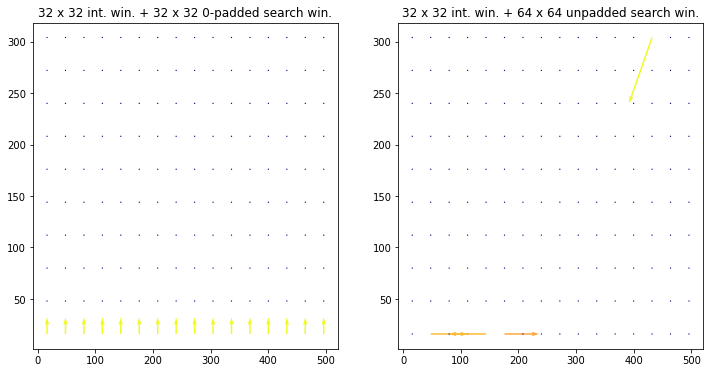

In [ ]:
xs_asym, ys_asym, dxs_asym, dys_asym = vel_field_asymmetric_wins(
    a, b, half_int_win_size, half_search_win_size
)
norm_drs_asym = np.sqrt(dxs_asym ** 2 + dys_asym ** 2)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].quiver(
    xs,
    ys[::-1],
    dxs,
    -dys,
    norm_drs,
    cmap=plt.cm.plasma,
    angles="xy",
    scale_units="xy",
    scale=0.25,
)
axs[1].quiver(
    xs_asym,
    ys_asym[::-1],
    dxs_asym,
    -dys_asym,
    norm_drs_asym,
    cmap=plt.cm.plasma,
    angles="xy",
    scale_units="xy",
    scale=0.25,
)
axs[0].set_title(
    f"{win_size} x {win_size} int. win. + "
    f"{win_size} x {win_size} 0-padded search win."
)
axs[1].set_title(
    f"{int_win_size[0]} x {int_win_size[1]} int. win. + "
    f"{search_win_size[0]} x {search_win_size[0]} unpadded search win."
)
ax.set_aspect("equal")
plt.show()

In [ ]:
winsize = 32 # pixels, interrogation window size in frame A
searchsize = 38  # pixels, search area size in frame B
overlap = 17 # pixels, 50% overlap
dt = 0.02 # sec, time interval between the two frames

u0, v0, sig2noise = pyprocess.extended_search_area_piv(
    a.astype(np.int32),
    b.astype(np.int32),
    window_size=winsize,
    overlap=overlap,
    dt=dt,
    search_area_size=searchsize,
    sig2noise_method='peak2peak',
)

In [ ]:
x, y = pyprocess.get_coordinates(
    image_size=a.shape,
    search_area_size=searchsize,
    overlap=overlap,
)

In [ ]:
u1, v1, mask = validation.sig2noise_val(
    u0, v0,
    sig2noise,
    threshold = 1.05,
)

In [ ]:
u2, v2 = filters.replace_outliers(
    u1, v1,
    method='localmean',
    max_iter=3,
    kernel_size=3,
)

In [ ]:
# convert x,y to mm
# convert u,v to mm/sec

x, y, u3, v3 = scaling.uniform(
    x, y, u2, v2,
    scaling_factor = 96.52,  # 96.52 pixels/millimeter
)

# 0,0 shall be bottom left, positive rotation rate is counterclockwise
x, y, u3, v3 = tools.transform_coordinates(x, y, u3, v3)

In [ ]:
tools.save(x, y, u3, v3, mask, 'exp1_001.txt' )

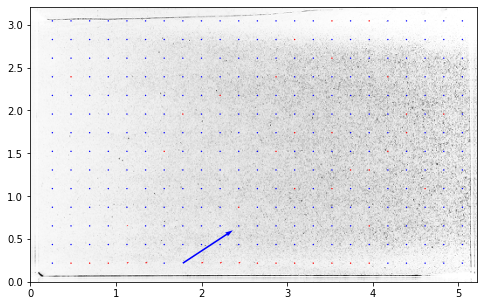

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field(
    'exp1_001.txt',
    ax=ax, scaling_factor=96.52,
    scale=50, # scale defines here the arrow length
    width=0.0035, # width is the thickness of the arrow
    on_img=True, # overlay on the image
    image_name='imageA.tif',
);